In [34]:
print("https://www.dataquest.io/blog/jupyter-notebook-tutorial/")

https://www.dataquest.io/blog/jupyter-notebook-tutorial/


In [4]:
a = 2+2
b = 3
c = a*b
print (c)



12


In [6]:
import numpy as np
def square(x):
    return x * x
print (square(2))

4


In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='darkgrid')
df = pd.read_csv("./data/fortune500.csv")
df.head(5)



,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [43]:
df.tail(2)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [45]:
print(df.columns)

Index(['Year', 'Rank', 'Company', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')


In [61]:
len(df)

25500

In [56]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [58]:
print (df.columns)

Index(['year', 'rank', 'company', 'revenue', 'profit'], dtype='object')


In [62]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [63]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [65]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [66]:
len(df.profit[non_numberic_profits])

369

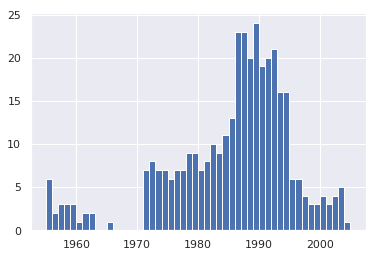

In [75]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [76]:
len(df)

25500

In [85]:
df = df.loc[~non_numberic_profits]


In [84]:
len(df)

25131

In [81]:
df.dtypes


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [91]:
group_by_year = df.loc[:, ['year','revenue','profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x,y,ax,title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x,y)
    ax.margins(x=0, y=0)

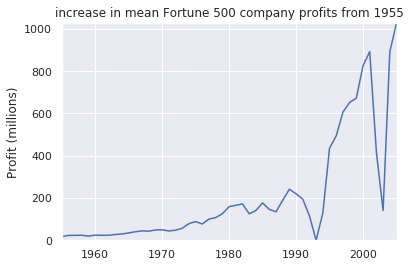

In [92]:
fig, ax = plt.subplots()
plot(x,y1,ax, 'increase in mean Fortune 500 company profits from 1955', 'Profit (millions)')

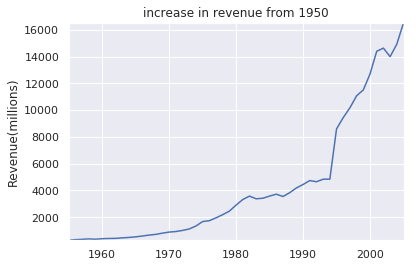

In [96]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x,y2,ax, 'increase in revenue from 1950', 'Revenue(millions)')

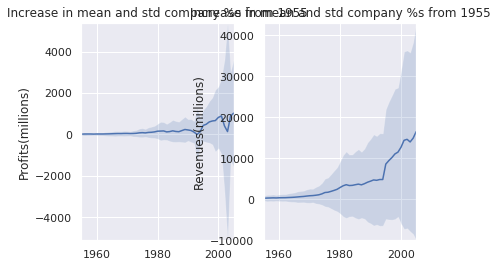

In [115]:
def plot_with_std(x,y,stds,ax,titile,y_label):
    ax.fill_between(x,y - stds, y + stds, alpha=0.2)
    plot(x,y,ax,title,y_label)

fig, (ax1,ax2)= plt.subplots(ncols=2)

title = 'Increase in mean and std company %s from 1955'
std1= group_by_year.std().profit.values

std2= group_by_year.std().revenue.values


plot_with_std(x,y1.values,std1,ax1,title % 'profits', 'Profits(millions)')
plot_with_std(x,y2.values, std2,ax2,title % 'revenues','Revenues(millions)')